In [91]:
import pandas as pd
import glob

from datasets import Dataset

In [93]:
images = glob.glob('/mnt/nas05/data01/vincenzo/ecallisto/data/*/*/*.png')

In [94]:
df = pd.DataFrame()

In [95]:
df['file_name'] = images
df['label'] = df['file_name'].str.split('/', expand=True)[8].astype(str)
df['antenna'] = df['file_name'].str.split('/', expand=True)[7].astype(str)
df['datetime'] = df['file_name'].str.split('/', expand=True)[9].str.replace('.png', '')
df['file_name'] = df['file_name'].str.replace('/mnt/nas05/data01/vincenzo/ecallisto/data/', '').astype(str)
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d_%H-%M-%S')#.astype('int64') // 10**9

In [96]:
df.to_csv('/mnt/nas05/data01/vincenzo/ecallisto/data/metadata.csv', index=False)

In [97]:
# Number of images per antenna
images_per_antenna = df['antenna'].value_counts()

# Number of burst types per antenna
burst_types_per_antenna = df.groupby('antenna')['label'].value_counts()

# Date range per antenna
date_range_per_antenna = df.groupby('antenna')['datetime'].agg([min, max])

/tmp/ipykernel_1504014/2540109473.py:8: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  date_range_per_antenna = df.groupby('antenna')['datetime'].agg([min, max])
/tmp/ipykernel_1504014/2540109473.py:8: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  date_range_per_antenna = df.groupby('antenna')['datetime'].agg([min, max])


/tmp/ipykernel_1504014/937259117.py:10: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  date_range_per_antenna = df.groupby('antenna')['datetime'].agg([min, max])
/tmp/ipykernel_1504014/937259117.py:10: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  date_range_per_antenna = df.groupby('antenna')['datetime'].agg([min, max])


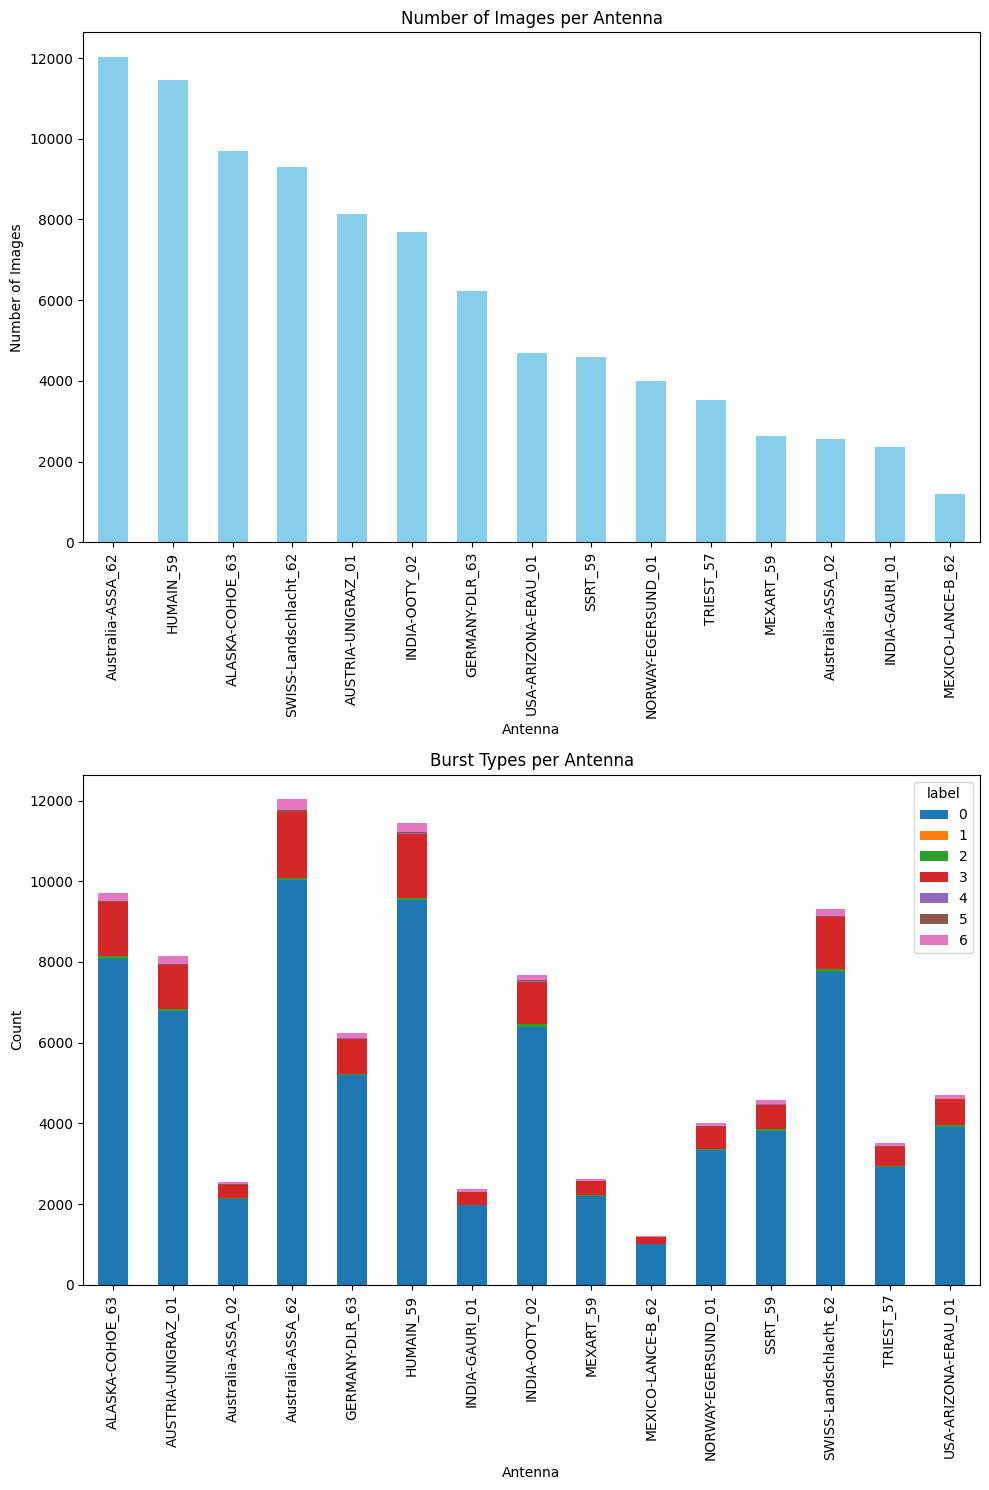

In [98]:
# EDA
import matplotlib.pyplot as plt
# Number of images per antenna
images_per_antenna = df['antenna'].value_counts()

# Number of burst types per antenna
burst_types_per_antenna = df.groupby('antenna')['label'].value_counts().unstack(fill_value=0)

# Date range per antenna
date_range_per_antenna = df.groupby('antenna')['datetime'].agg([min, max])

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# Images per antenna
images_per_antenna.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Number of Images per Antenna')
ax[0].set_xlabel('Antenna')
ax[0].set_ylabel('Number of Images')

# Burst types per antenna
burst_types_per_antenna.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Burst Types per Antenna')
ax[1].set_xlabel('Antenna')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [100]:
from datasets import load_dataset
dataset = load_dataset('imagefolder', data_dir='/mnt/nas05/data01/vincenzo/ecallisto/data/', split='train')

Computing checksums: 100%|██████████| 90144/90144 [01:50<00:00, 814.04it/s]
Generating train split: 90143 examples [00:54, 1650.83 examples/s]


In [101]:
dataset.push_to_hub('i4ds/radio-sunburst-ecallisto')

Uploading the dataset shards: 100%|██████████| 3/3 [07:46<00:00, 155.62s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/i4ds/radio-sunburst-ecallisto/commit/dc43d21717620699a2f51b4749ae575cd889a08d', commit_message='Upload dataset', commit_description='', oid='dc43d21717620699a2f51b4749ae575cd889a08d', pr_url=None, pr_revision=None, pr_num=None)

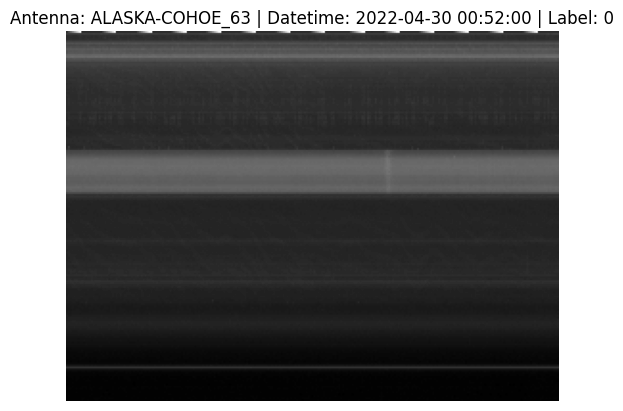

In [102]:
# Display the image
plt.imshow(dataset[300]['image'], cmap='gray')  # 'gray' colormap for mode=L (grayscale)
plt.title(f"Antenna: {dataset[300]['antenna']} | Datetime: {dataset[300]['datetime']} | Label: {dataset[300]['label']}")
plt.axis('off')  # Turn off the axis
plt.show()